In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import random
from openpyxl import Workbook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

In [9]:
# Начальные данные 
x1_coords = [11,11,11,11,7,7,7,7,12.4,5.6,9,9,9,9,9,9,9,9,9,9,11]
x2_coords = [30,30,20,20,30,30,20,20,25,25,33.4,16.6,25,25,25,25,25,25,25,25,30]
u_list = [0.001886773,0.001888856,0.001839001,0.001840592,0.001861987,0.001858253,0.001799142,0.001809188,0.001869552,0.001828953,0.001876969,0.001792872,0.001852198,0.001849231,0.001860251,0.00184314,0.001878281,0.00185562,0.001851013,0.001839322,0.001886816]
u_values = [round(item * 10**6,2) for item in u_list]

In [10]:
# линейная функция
def linear_func(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2

# квадратичная функция
def quadratic_func(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * x1**2 + theta[4] * x2**2

# квадратичная функция со смешанными произведениями
def quadratic_func_mixed(x1, x2, theta):
    return theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * x1**2 + theta[4] * x2**2 + theta[5] * x1 * x2

In [11]:
n = len(x1_coords)
ro = 0.1
u_medium = np.full((n,), sum(u_values) / n)
w_squar = (np.dot((u_values - u_medium), (u_values - u_medium))) / (n - 1)
sigma = (ro * w_squar) ** (0.5)
y_values = u_values

In [12]:
# ЛИНЕЙНАЯ МОДЕЛЬ
m = 3
a = 0.05
x_1 = np.ones(n)
x_2 = np.reshape(x1_coords, (n, ))
x_3 = np.reshape(x2_coords, (n, ))

X = np.array([x_1, x_2, x_3]).T
y = np.reshape(y_values, (n, 1))

# МНК
theta_hat = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_hat = np.dot(X, theta_hat)
e_hat = y - y_hat
sigma_squar_hat = np.dot(e_hat.T, e_hat) / (n - m)

F = sigma_squar_hat[0][0] / sigma**2
FT = scipy.stats.f.ppf(q = 1 - a, dfn = 2 ** 30, dfd = n - m)

# вычисляем rmse
e_hat_2 = e_hat*e_hat
sum_e = sum(e_hat_2)
rmse = sqrt((sum_e/n)[0])

# Вывод результата
if F <= FT:
    print('Модель адекватна')
else:
    print('Модель не адекватна')
print('RMSE линейной модели: ', round(rmse,2))

Модель адекватна
RMSE линейной модели:  9.06


In [13]:
# КВАДРАТИЧНАЯ МОДЕЛЬ
m = 5
a = 0.05
x_1 = np.ones(n)
x_2 = np.reshape(x1_coords, (n, ))
x_3 = np.reshape(x2_coords, (n, ))
x_4 = pow(np.reshape(x1_coords, (n, )), 2)
x_5 = pow(np.reshape(x2_coords, (n, )), 2)

X = np.array([x_1, x_2, x_3, x_4, x_5]).T
y = np.reshape(y_values, (n, 1))

# МНК
theta_hat = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_hat = np.dot(X, theta_hat)
e_hat = y - y_hat
sigma_squar_hat = np.dot(e_hat.T, e_hat) / (n - m)

F = sigma_squar_hat[0][0] / sigma**2
FT = scipy.stats.f.ppf(q = 1 - a, dfn = 2 ** 30, dfd = n - m)

# вычисляем rmse
e_hat_2 = e_hat*e_hat
sum_e = sum(e_hat_2)
rmse = sqrt((sum_e/n)[0])


# Вывод результата
if F <= FT:
    print('Модель адекватна')
else:
    print('Модель не адекватна')
print('RMSE квадратичной модели: ', round(rmse,2))

Модель адекватна
RMSE квадратичной модели:  7.46


In [14]:
# КВАДРАТИЧНАЯ МОДЕЛЬ СО СМЕШАННЫМ ПРОИЗВЕДЕНИЕМ
m = 6
a = 0.05
x_1 = np.ones(n)
x_2 = np.reshape(x1_coords, (n, ))
x_3 = np.reshape(x2_coords, (n, ))
x_4 = pow(np.reshape(x1_coords, (n, )), 2)
x_5 = pow(np.reshape(x2_coords, (n, )), 2)
x_6 = np.reshape(x1_coords, (n, ))*np.reshape(x2_coords, (n, ))

X = np.array([x_1, x_2, x_3, x_4, x_5, x_6]).T
y = np.reshape(y_values, (n, 1))

# МНК
theta_hat = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_hat = np.dot(X, theta_hat)
e_hat = y - y_hat
sigma_squar_hat = np.dot(e_hat.T, e_hat) / (n - m)

F = sigma_squar_hat[0][0] / sigma**2
FT = scipy.stats.f.ppf(q = 1 - a, dfn = 2 ** 30, dfd = n - m)

# вычисляем rmse
e_hat_2 = e_hat*e_hat
sum_e = sum(e_hat_2)
rmse = sqrt((sum_e/n)[0])

# Вывод результата
if F <= FT:
    print('Модель адекватна')
else:
    print('Модель не адекватна')
print('RMSE квадратичной модели со смешанным произведением: ', round(rmse,2))

Модель адекватна
RMSE квадратичной модели со смешанным произведением:  7.37


In [16]:
# Поиск максимального значения по сетке с использованием квадратичной модели со смешанным произведением:
x1_max = 12.4
x2_max = 33.4

x1 = 5.6
x2 = 16.6
y_max = 0

x1_list = []
x2_list = []
y_list = []


while x1 <= x1_max:
    while x2 <= x2_max:
        y = quadratic_func_mixed(x1, x2, theta_hat)
        
        x1_list.append(x1)
        x2_list.append(x2)
        y_list.append(y)
        
        if(y>y_max):
            y_max = y
            x1_need = x1
            x2_need = x2
        x2 += 0.1
    x2 = 16.6
    x1 += 0.1

print('\n', 'Результат:')
print('y_max =',round(y_max[0],2), '\nx1 =',round(x1_need,2), '\nx2 =',round(x2_need,2))


 Результат:
y_max = 1896.24 
x1 = 12.4 
x2 = 33.3


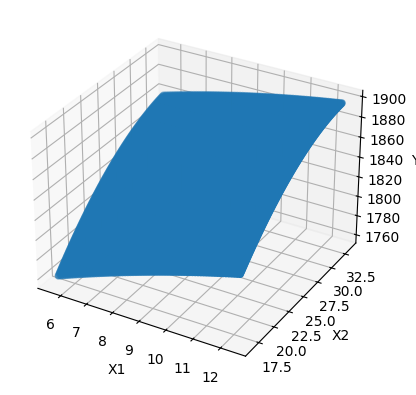

In [17]:
# График построенной модели
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1_list, x2_list, y_list)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()